# A. Imputation de valeurs manquantes

In [82]:
#datavf.loc[datavf['UID'].isnull(),['Joueur','Name','Name_encoded','Âge','Age_encoded']]

In [83]:
data['Name_encoded3'] = data['Name'].apply(lambda x: x.split(" ")[1:])
data['lenname'] = data['Name_encoded3'].apply(lambda x: len(x))

#data.loc[data['UID']==19248729,['Name','Name_encoded3','lenname']]

In [84]:
dataverif = data.loc[data['lenname']==0,:]
dataverif.shape
#dataverif.loc[:,['Name','UID']]

(7906, 102)

In [85]:
list_espace = []
for i in dataverif['Name']:
    list_espace.append('* '+i)

In [86]:
#list_espace

In [87]:
data.loc[data['lenname']==0,'Name'] = list_espace

In [88]:
data.loc[data['UID']==19248729,['Name','Name_encoded3','lenname']]

,Name,Name_encoded3,lenname
33605,* Wanderson,[],0


In [89]:
x = data.loc[data['UID']== 19045800,'Name']
y = x.tolist()
y

['* Arghus']

In [90]:
data['Name_encoded1'] = data['Name'].apply(lambda x: x.split(" ")[0])
data['Name_encoded1'] = data['Name_encoded1'].apply(lambda x : x[:1])
data.loc[data['UID']==19045800,['Name','Name_encoded3','lenname','Name_encoded1']]

,Name,Name_encoded3,lenname,Name_encoded1
30491,* Arghus,[],0,*


In [91]:
data['Name_encoded2'] = data['Name'].apply(lambda x: x.split(" ")[1:])
data['Name_encoded2'] = data['Name_encoded2'].apply(lambda x: ' '.join(ch for ch in x))
data.loc[data['UID']==19045800,['Name','Name_encoded3','lenname','Name_encoded1','Name_encoded2']]

,Name,Name_encoded3,lenname,Name_encoded1,Name_encoded2
30491,* Arghus,[],0,*,Arghus


In [92]:
list_data_name_encoded = []

for i,j in zip(data['Name_encoded1'],data['Name_encoded2']) :
    if i == '*':
        list_data_name_encoded.append(j)
    else :
        list_data_name_encoded.append(i+". "+j)

In [93]:
#list_data_name_encoded

In [94]:
data['Name_encoded'] = list_data_name_encoded

In [43]:
## b. Imputation des valeurs nulles de la variable 'Weight' par régression linéaire

In [44]:
# création de filtres
mask = data['Weight']>0
datafiltre = data.loc[mask,:]
datafiltre0 = data.loc[data['Weight'] == 0,:]

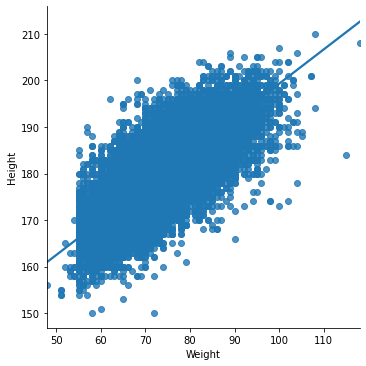

In [45]:
# visualisation de la relation entre le poids et la taille
# L'objectif étant de vérifier si une imputation du poids par la taille se justifie
sns.lmplot(x='Weight', y='Height', data = datafiltre)

In [46]:
# création des train et test sets d'apprentissage
x_train = np.array(datafiltre['Height'])
x_train = x_train.reshape(-1,1)
x_test = np.array(datafiltre0['Height'])
x_test = x_test.reshape(-1,1)
y_train = np.array(datafiltre['Weight'])
y_train = y_train.reshape(-1,1)

In [47]:
# normalisation
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
#x_train

In [48]:
# instanciation du modèle
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() # on crée une instance de la classe

regressor.fit(x_train, y_train)

regressor.score(x_train, y_train)

0.6085585484279299

In [49]:
# Prédiction du poids pour les joueurs dont la valeur est manquante grâce au modèle
weight_imputation = regressor.predict(x_test)
#weight_imputation

In [50]:
# Formatage des valeurs à imputer sous forme de liste
weight_imputation = pd.DataFrame(weight_imputation)
weight_imputation
list_weight = []
for i in weight_imputation[0]:
    list_weight.append(int(i))
type(list_weight[0])

int

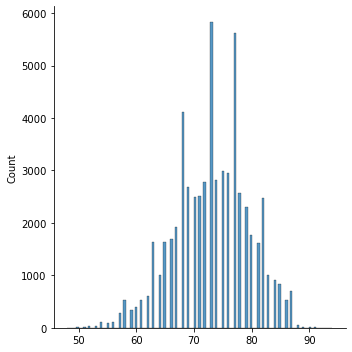

In [51]:
# visualisation de la distribution des valeurs à imputer
sns.displot(x=list_weight)

In [52]:
# imputation des valeurs
data.loc[data['Weight'] == 0,'Weight'] = list_weight

In [53]:
# contrôle de la bonne imputation
data.loc[data['UID'] == 1014408,:]

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,TendencyToPunch,Throwing,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,LongShots,Longthrows,Marking,Passing,PenaltyTaking,Tackling,Technique,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Acceleration,Agility,Balance,Jumping,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryProness,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,InjuryPronessReverse
219,1014408,Yusmin Hatta,109,26-04-1983,33,0,0,0,0,183,76,1,3,1,3,2,2,2,2,3,1,1,3,2,5,13,7,4,9,3,2,2,5,4,1,6,6,6,3,7,5,5,8,3,6,12,4,2,2,5,8,5,5,10,6,6,7,20,6,7,6,6,2,6,6,13,9,11,10,11,14,12,8,S,1,1,20,1,1,1,1,1,1,1,1,1,1,1,1,14


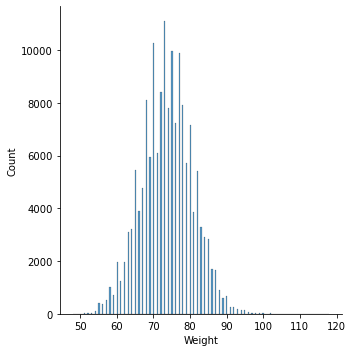

In [54]:
# visualisation et contrôle de la distribution du poids des joueurs de la base de données
sns.displot(data = data, x = 'Weight')

# B. Formatage du nom des joueurs

In [83]:
# Processing du texte pour transformer le "Prénom Nom" en "P. Nom"
# 'Name_encoded3' > Gestion des "Nom" Uniques
data['Name_encoded3'] = data['Name'].apply(lambda x: x.split(" ")[1:])
data['lenname'] = data['Name_encoded3'].apply(lambda x: len(x))

In [84]:
# Contrôle du nombre de joueur ayant un Nom Unique au format  "Nom"
dataverif = data.loc[data['lenname']==0,:]
dataverif.shape

(7906, 102)

In [85]:
# Création d'un marqueur pour pouvoir opérer les process généraux
list_espace = []
for i in dataverif['Name']:
    list_espace.append('* '+i)

In [87]:
# Imputation du marqueur
data.loc[data['lenname']==0,'Name'] = list_espace

In [88]:
# Contrôle de la bonne imputation
data.loc[data['UID']==19248729,['Name','Name_encoded3','lenname']]

,Name,Name_encoded3,lenname
33605,* Wanderson,[],0


In [90]:
# Process généraux pour formatage de la variable 'Name'
# 'Name_encoded1' > Gestion du "Prénom"
data['Name_encoded1'] = data['Name'].apply(lambda x: x.split(" ")[0])
data['Name_encoded1'] = data['Name_encoded1'].apply(lambda x : x[:1])
data.loc[data['UID']==19045800,['Name','Name_encoded3','lenname','Name_encoded1']]

,Name,Name_encoded3,lenname,Name_encoded1
30491,* Arghus,[],0,*


In [91]:
# 'Name_encoded2' > Gestion du "Nom"
data['Name_encoded2'] = data['Name'].apply(lambda x: x.split(" ")[1:])
# Gestion des Noms composés
data['Name_encoded2'] = data['Name_encoded2'].apply(lambda x: ' '.join(ch for ch in x))
data.loc[data['UID']==19045800,['Name','Name_encoded3','lenname','Name_encoded1','Name_encoded2']]

,Name,Name_encoded3,lenname,Name_encoded1,Name_encoded2
30491,* Arghus,[],0,*,Arghus


In [92]:
# Boucle permettant le formatage final
list_data_name_encoded = []

for i,j in zip(data['Name_encoded1'],data['Name_encoded2']) :
    if i == '*':
        list_data_name_encoded.append(j)
    else :
        list_data_name_encoded.append(i+". "+j)

In [94]:
# Création de la variable 'Name_encoded' nouvelle clé de jointure des fichiers
data['Name_encoded'] = list_data_name_encoded

# C. Manipulation de_données temporelles

In [100]:
# Formatage de la date de naissance
data['Born_day'] = data['Born'].apply(lambda x: x.split("-")[0])
data['Born_month'] = data['Born'].apply(lambda x: x.split("-")[1])
data['Born_year'] = data['Born'].apply(lambda x: x.split("-")[2])
data['Born_date'] = pd.to_datetime(data['Born_year']+'-'+data['Born_month']+'-'+data['Born_day'])

In [102]:
# Formatage date de référence en cohérence avec l'autre base de donnée 'base non dynamique'
data['End_date'] = data['Born'].apply(lambda x : "2021-3-12")
data['End_date'] = pd.to_datetime(data['End_date'])

In [103]:
# Calculet création de la variable 'Age_encoded'pour jointure
from datetime import date, timedelta
data['Age_encoded'] = data['End_date'] - data['Born_date']
data['Age_encoded'] = data['Age_encoded'].apply(lambda x : x // timedelta(days=365.2425))

In [104]:
## Jointure des fichiers

In [105]:
datavf = dataset.merge(data, left_on = ['Joueur','Âge'], right_on = ['Name_encoded','Age_encoded'], how = 'inner')
datavf.head(6)

,Joueur,Équipe,Position Générale Jointure WS,Position Générale,Position Détaillée,Position détaillée 1_x,Position détaillée 2_x,Position détaillée 3_x,Âge,Valeur marchande,Fin de contrat,Matchs joués,Minutes jouées,Buts,xG,Passes décisives,xA,Duels par 90,"Duels gagnés, %",Pays de naissance,Passeport pays,Pied,Taille,Poids,Prêté,Actions défensives réussies par 90,Duels défensifs par 90,"Duels défensifs gagnés, %",Duels aériens par 90,"Duels aériens gagnés, %",Tacles glissés par 90,Tacles glissés PAdj,Tirs bloqués par 90,Interceptions par 90,Interceptions PAdj,Fautes par 90,Cartons jaunes,Cartons jaunes par 90,Cartons rouges,Cartons rouges par 90,Attaques réussies par 90,Buts par 90,Buts hors penalty,Buts hors penalty par 90,xG par 90,Buts de la tête,Buts de la tête par 90,Tirs,Tirs par 90,"Tirs à la cible, %",Taux de conversion but/tir,Passes décisives par 90,Centres par 90,"Сentres précises, %",Centres du flanc gauche par 90,"Centres du flanc gauche précises, %",Centres du flanc droit par 90,"Centres du flanc droit précises, %",Centres dans la surface de but par 90,Dribbles par 90,"Dribbles réussis, %",Duels offensifs par 90,"Duels de marquage, %",Touches de balle dans la surface de réparation sur 90,Courses progressives par 90,Accélérations par 90,Passes réceptionnées par 90,Longues passes réceptionnées par 90,Fautes subies par 90,Passes par 90,"Passes précises, %",Passes avant par 90,"Passes en avant précises, %",Passes arrière par 90,"Passes arrière précises, %",Passes latérales par 90,"Passes latérales précises, %",Passes courtes / moyennes par 90,"Passes courtes / moyennes précises, %",Passes longues par 90,"Longues passes précises, %",Longueur moyenne des passes (en m),Longueur moyenne des passes longues (en m),xA par 90,Passes décisives avec tir par 90,Secondes passes décisives par 90,Troisièmes passes décisives par 90,Passes judicieuses par 90,"Passes intelligentes précises, %",Passes quasi décisives par 90,Passes dans tiers adverse par 90,"Passes dans tiers adverse précises, %",Passes vers la surface de réparation par 90,"Passes vers la surface de réparation précises, %",Passes pénétrantes par 90,"Passes en profondeur précises, %",Réalisations en profondeur par 90,"Centres en profondeur, par 90",Passes progressives par 90,"Passes progressives précises, %",Buts concédés,Buts concédés par 90,Tirs concédés,Tirs concédés par 90,Cages inviolées,"Enregistrer, %",xG contre,xG contre par 90,Buts évités,Buts évités par 90,Passes arrière au gardien de but par 90,Sorties par 90,Duels aériens par 90,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %",UID,Name,Position Générale Jointure,Position Générale y,Position détaillée 1_y,Position détaillée 2_y,Position détaillée 3_y,Position détaillée 4,Position détaillée 5,Position détaillée 6,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,TendencyToPunch,Throwing,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,LongShots,Longthrows,Marking,Passing,PenaltyTaking,Tackling,Technique,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Acceleration,Agility,Balance,Jumping,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryProness,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,InjuryPronessReverse,Poste,Poste_ordre,Name_encoded3,lenname,Name_encoded1,Name_encoded2,Name_encoded,Born_day,Born_month,Born_year,Born_date,End_date,Age_encoded
